# 6.86x - Introduction to ML Packages (Part 1)¶


This tutorial is designed to provide a bird's eye view of the ML packages landscape. The goal is not to give an in-depth explanation of all the features of each packages, but rather demonstrate the purpose of a few widely used ML packages. For more details, we refer the reader to the packages' documentation and other online tutorials.

You can go through the Jupyter, Numpy and Matplotlib sections before the course starts, and then start studying the next sections after you have completed unit 1.

# Jupyter
Jupyter is not strictly speaking an ML package. It provides a browser front-end connected to an instance of IPython which allows REPL for quick testing, allows to create documents that intertwines code, output, images, and text. This is great for prototyping, demonstrations and tutorials, but terrible for actual coding.

In [3]:
6*7

42

In [6]:
def tokenize(text):
    return text.split(" ")

In [7]:
text = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley"

print(tokenize(text))

['In', 'a', 'shocking', 'finding,', 'scientist', 'discovered', 'a', 'herd', 'of', 'unicorns', 'living', 'in', 'a', 'remote,', 'previously', 'unexplored', 'valley']


# Numpy

Numpy is desiged to handle large multidimensional arrays and enable efficient computations with them. In the back, it runs pre-compiled C code which is much faster than, say, a Python for loop

In this section, we'll cover indexing, slicing and broadcasting, which are useful concepts that will be reused in Pandas and PyTorch.


## Indexing and slicing 

Numpy arrays can be indexed and sliced like regular python arrays

In [8]:
a_py = [1,2,3,4,5,6,7,8,9]
a_np = np.array(a_py)

In [17]:
print(a_py[3:7:2], a_np[3:7:2])
print(a_py[2:-1:2], a_np[2:-1:2])
print(a_py[::-1], a_np[::-1])

[4, 6] [4 6]
[3, 5, 7] [3 5 7]
[9, 8, 7, 6, 5, 4, 3, 2, 1] [9 8 7 6 5 4 3 2 1]


But you can also use arrays to index other arrays

In [18]:
idx = np.array([7,2])
a_np[idx]

array([8, 3])

This in turn allows convenient querying, reindexing and even sorting

In [21]:
ages = np.random.randint(low=30, high=60, size =10)
heights = np.random.randint(low=150, high= 210, size=10)

print(ages)
print(heights)

[41 50 47 40 42 47 38 44 55 46]
[175 185 154 168 187 182 195 197 158 183]


In [22]:
print(ages < 50)

[ True False  True  True  True  True  True  True False  True]


In [23]:
print(heights[ages < 50])

[175 154 168 187 182 195 197 183]


In [25]:
print(heights[ages < 50])
print(ages[ages < 50])

[175 154 168 187 182 195 197 183]
[41 47 40 42 47 38 44 46]


In [27]:
shuffled_idx = np.random.permutation(10)
print(shuffled_idx)
print(ages[shuffled_idx])
print(heights[shuffled_idx])

[2 6 9 8 7 1 5 3 4 0]
[47 38 46 55 44 50 47 40 42 41]
[154 195 183 158 197 185 182 168 187 175]


In [28]:
sorted_idx = np.argsort(ages)
print(sorted_idx)
print(ages[sorted_idx])
print(heights[sorted_idx])

[6 3 0 4 7 9 2 5 1 8]
[38 40 41 42 44 46 47 47 50 55]
[195 168 175 187 197 183 154 182 185 158]


# Broadcasting

When Numpy is asked to perform an operation between arrays of different sizes, it "broadcasts" the smaller one to the bigger one

In [29]:
a = np.array([4,5,6])
b = np.array([2,2,2])
a * b

array([ 8, 10, 12])

In [30]:
a = np.array([4,5,6])
b = 2 
a * b

array([ 8, 10, 12])

The two snippets of code above are equivalent but the second is easier to read and also more efficient.

In [32]:
a = np.arange(10).reshape(1,10)
b = np.arange(12).reshape(12,1)

print(a)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [35]:
print(a*b)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]
 [ 0 11 22 33 44 55 66 77 88 99]]


In [36]:
print(b*a)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]
 [ 0 11 22 33 44 55 66 77 88 99]]


# Matplotlib

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt 

In [38]:
plt.rcParams["figure.figsize"] = [10,7]

Matplotlib is the go-to library to produce plots with Python. It comes with two APIs: 
- a MATLAB-like that a lot of people have learned to use and love, 
- and an object-oriented API that we recommend using.

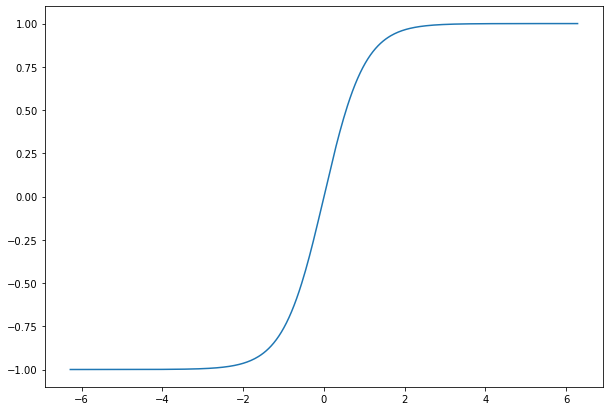

In [44]:
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.tanh(x)
fig, ax = plt.subplots()
ax.plot(x,y)

You can plot multiple subplots in the same figure, or multiple functions in the same subplot 

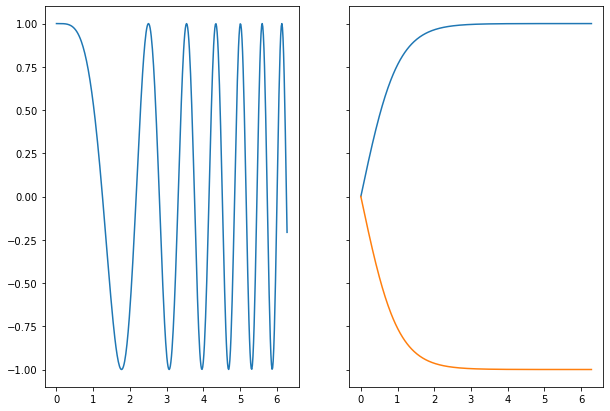

In [48]:
x = np.linspace(0, 2*np.pi, 400)
y1 = np.tanh(x)
y2 = np.cos(x**2)
fig, axes = plt.subplots(1,2, sharey= True)
axes[1].plot(x,y1) # plots blue curve in right subplot
axes[1].plot(x, -y1) # plots red cureve in right subplot
axes[0].plot(x, y2) # plots on left subplot


Matplotlib also comes with a lot of different options to customize, the colors, the labels, the axes, etc.

For instance, see this introduction to 2D and 3D plotting with matplotlib link: https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

# Scikit-learn 

Sklearn includes a number of features and utiliities to kickstart your journey in Machine Learning 

## A toy example

In [50]:
from sklearn.datasets import make_blobs

In [60]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

print(X[:5]) 
print(y[:5])

[[0.4666179  3.86571303]
 [2.84382807 3.32650945]
 [0.61121486 2.51245978]
 [3.81653365 1.65175932]
 [1.28097244 0.62827388]]
[0 0 0 1 1]


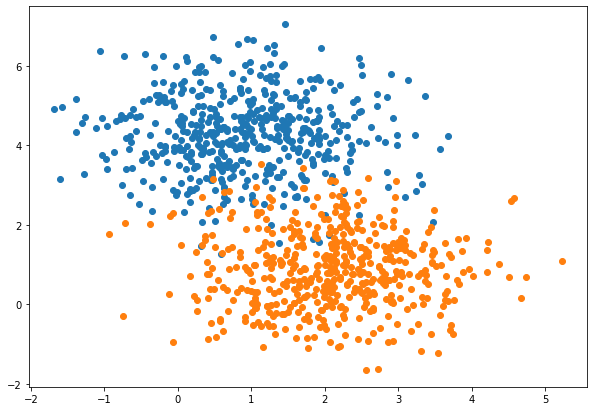

In [53]:
fig, ax = plt.subplots()
for label in [0,1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [55]:
mask = y == label
mask[:10]

array([False, False, False,  True,  True, False,  True, False, False,
        True])

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

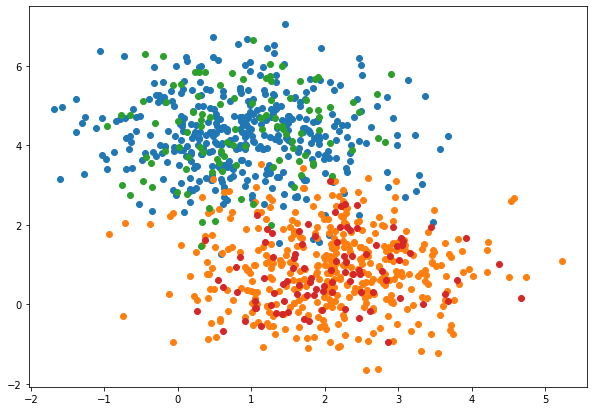

In [64]:
fig, ax = plt.subplots()

for label in [0,1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])

for label in [0,1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

Sklearn uses a uniform and very consistent API, making it easy to switch algorithms

For instance, training and predicting with a perceptron.

In [65]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [66]:
clf = Perceptron(max_iter=40, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

Test accuracy: 0.96


In [73]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

print(theta)
print(theta_0)

[  0.25169922 -12.36998085]
[24.]


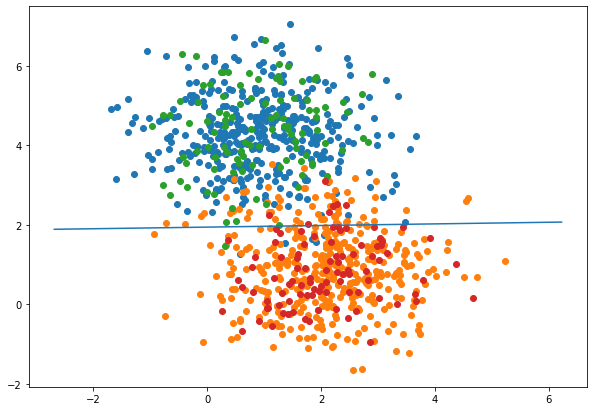

In [76]:
fig, ax = plt.subplots()
for label in [0,1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])

for label in [0,1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

x_bnd = np.linspace(X[:,0].min() - 1, X[:, 0].max() + 1, 400)
y_bnd = -x_bnd * (theta[0] / theta[1]) - (theta_0 / theta[1])

ax.plot(x_bnd, y_bnd)

Let's try the same using SCV

In [77]:
svc = LinearSVC(max_iter=40, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

Test accuracy: 0.975


In [83]:
# Get the coefficients and the intercept
theta = svc.coef_[0]
theta_0 = svc.intercept_

print(theta)
print(theta_0)

[ 0.12498811 -0.90486458]
[2.09366022]


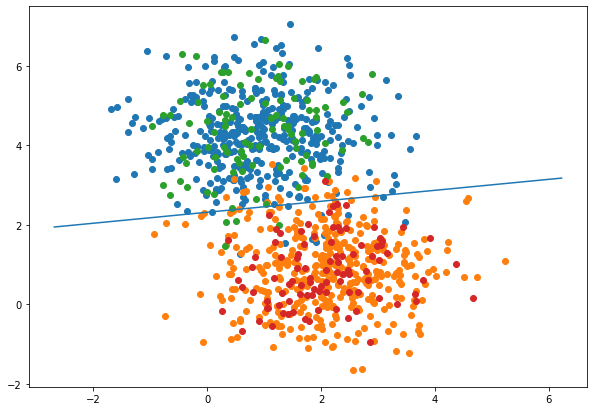

In [98]:
fig, ax = plt.subplots()

for label in [0,1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])

for label in [0,1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

x_bnd = np.linspace(X[:,0].min() - 1, X[:, 0].max() +1 , 400)
y_bnd = - x_bnd * (theta[0] / theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)

## Another toy example

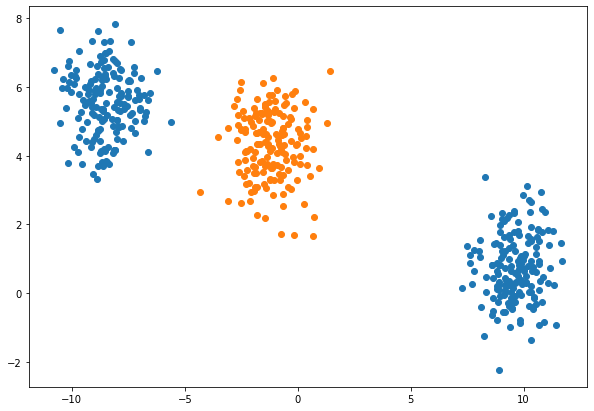

In [101]:
X, y = make_blobs(n_samples=500, centers=3, random_state=7)
y[y==2] = 0
fig, ax = plt.subplots()
for label in [0,1]:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask,1])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [120]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=0)
clf.fit(X_train, y_train)

SVC(random_state=0)

In [121]:
y_pred = clf.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_pred, y_test)}")

Test accuracy: 1.0


In [122]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

print( x_min, x_max, y_min, y_max)

-10.779017486122063 11.68326384871622 -2.230398734668202 7.845970897609993


`np.mgrid` returns a dense multi-dimensional “meshgrid”.

In [123]:
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
XX, YY

(array([[-10.77901749, -10.77901749, -10.77901749, ..., -10.77901749,
         -10.77901749, -10.77901749],
        [-10.6661417 , -10.6661417 , -10.6661417 , ..., -10.6661417 ,
         -10.6661417 , -10.6661417 ],
        [-10.55326591, -10.55326591, -10.55326591, ..., -10.55326591,
         -10.55326591, -10.55326591],
        ...,
        [ 11.45751228,  11.45751228,  11.45751228, ...,  11.45751228,
          11.45751228,  11.45751228],
        [ 11.57038806,  11.57038806,  11.57038806, ...,  11.57038806,
          11.57038806,  11.57038806],
        [ 11.68326385,  11.68326385,  11.68326385, ...,  11.68326385,
          11.68326385,  11.68326385]]),
 array([[-2.23039873, -2.17976371, -2.12912869, ...,  7.74470085,
          7.79533587,  7.8459709 ],
        [-2.23039873, -2.17976371, -2.12912869, ...,  7.74470085,
          7.79533587,  7.8459709 ],
        [-2.23039873, -2.17976371, -2.12912869, ...,  7.74470085,
          7.79533587,  7.8459709 ],
        ...,
        [-2.230398

`np.ravel` returns a contiguous flattened array.

In [124]:
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(Z)

[-1.12093975 -1.12752535 -1.13417406 ... -0.97784668 -0.974521
 -0.97121263]


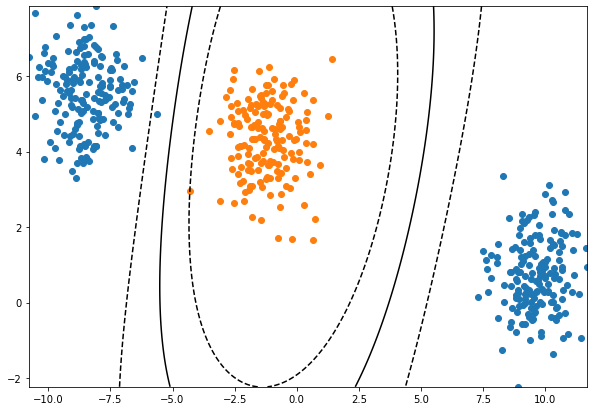

In [125]:
# Plot results
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])
    
Z = Z.reshape(XX.shape)
ax.contour(XX, YY, Z, colors="black",
    linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

## Classify digits 

In [126]:
from sklearn.datasets import load_digits

In [128]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y,                                                 test_size=0.2, random_state = 0)

`plt.axes.matshow`

Plot the values of a 2D matrix or array as color-coded image.

The matrix will be shown the way it would be printed, with the first row at the top. Row and column numbering is zero-based.

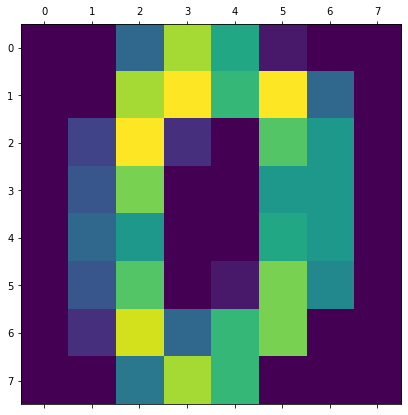

In [129]:
fig, ax = plt.subplots()
ax.matshow(digits.images[0])

In [130]:
X_train.shape

(1437, 64)

In [131]:
clf = Perceptron(max_iter=40, random_state=0)

In [137]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 4)}")

Accuracy: 0.9389


Let's see where our classifier goes wrong

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y_test, clf.predict(X_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 27,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  1,  0, 35,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0,  6, 32]], dtype=int64)

Scikit-learn also includes utilities to quickly compute a cross validation score...

In [140]:
from sklearn.model_selection import cross_val_score

clf = LinearSVC(C=1, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Mean: {np.mean(scores)} \n Std: {np.std(scores)}")

Mean: 0.9436193379790939 
 Std: 0.015816522343750885


We can also perform a grid search

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
clf = LinearSVC(random_state= 0)
param_grid = {"C": 10. ** np.arange(-6,4)}
print(param_grid)

{'C': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])}


In [143]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=4,                           return_train_score=True)

In [144]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1e-06 .........................................................
[CV] ......... C=1e-06, score=(train=0.883, test=0.844), total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ......... C=1e-06, score=(train=0.880, test=0.865), total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ......... C=1e-06, score=(train=0.869, test=0.909), total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ......... C=1e-06, score=(train=0.880, test=0.840), total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ......... C=1e-06, score=(train=0.873, test=0.899), total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ......... C=1e-05, score=(train=0.929, test=0.906), total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ......... C

GridSearchCV(cv=5, estimator=LinearSVC(random_state=0),
             param_grid={'C': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])},
             return_train_score=True, verbose=4)

In [145]:
print(grid_search.best_params_)

{'C': 0.001}


In [146]:
print(grid_search.best_score_)

0.9672981997677119


In [147]:
y_pred = grid_search.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9638888888888889


There's lots more to be discovered. We have only looked at some classification models and some model selection features, but sklearn can also be used for regression, 

# Pandas

Pandas is a library that provides a set of tools for data analysis (Python Data Analysis Library).

Pandas dataframes can be created by importing a CSV file (or TSV, or JSON, or SQL, etc.)

In [149]:
import pandas as pd 
# df = pd.read_csv("anyfile.csv")

Pandas dataframes can also be created directly from a dictionary of arrays

In [150]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.01945119, 0.02111206, 0.02065787, 0.03326964, 0.10920768,
       0.10160351, 0.10919466, 0.14985943, 0.12693319, 0.10024977]), 'std_fit_time': array([0.00193669, 0.00164074, 0.00239441, 0.00234345, 0.00665288,
       0.00721231, 0.00458592, 0.01467963, 0.01736624, 0.00314784]), 'mean_score_time': array([0.0007946 , 0.00079827, 0.00099726, 0.00079775, 0.00079803,
       0.00099688, 0.0009985 , 0.00079851, 0.00079799, 0.0004014 ]), 'std_score_time': array([7.45542779e-04, 7.47003014e-04, 6.29021168e-04, 7.46608273e-04,
       3.99017619e-04, 2.30367133e-06, 6.31506271e-04, 3.99256621e-04,
       3.98993930e-04, 4.91626686e-04]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                   100.0, 1000.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.0

In [151]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019451,0.001937,0.000795,0.000746,1e-06,{'C': 1e-06},0.843750,0.864583,0.909408,0.839721,...,0.871283,0.028349,10,0.882507,0.879896,0.868696,0.880000,0.873043,0.876828,0.005141
1,0.021112,0.001641,0.000798,0.000747,1e-05,{'C': 1e-05},0.906250,0.916667,0.944251,0.905923,...,0.922075,0.015897,9,0.928634,0.930374,0.922609,0.933043,0.925217,0.927975,0.003695
2,0.020658,0.002394,0.000997,0.000629,0.0001,{'C': 0.0001},0.937500,0.940972,0.968641,0.937282,...,0.950607,0.014783,4,0.963446,0.964317,0.960000,0.961739,0.957391,0.961379,0.002483
3,0.033270,0.002343,0.000798,0.000747,0.001,{'C': 0.001},0.961806,0.965278,0.968641,0.961672,...,0.967298,0.006432,1,0.982594,0.982594,0.982609,0.980870,0.981739,0.982081,0.000691
4,0.109208,0.006653,0.000798,0.000399,0.01,{'C': 0.01},0.958333,0.961806,0.968641,0.961672,...,0.964516,0.005071,2,0.992167,0.993908,0.995652,0.993043,0.993913,0.993737,0.001155
5,0.101604,0.007212,0.000997,0.000002,0.1,{'C': 0.1},0.947917,0.965278,0.947735,0.954704,...,0.953371,0.006476,3,0.997389,0.995648,0.998261,0.992174,0.995652,0.995825,0.002087
6,0.109195,0.004586,0.000998,0.000632,1,{'C': 1.0},0.937500,0.968750,0.919861,0.947735,...,0.943619,0.015817,7,0.993037,0.993908,0.988696,0.993913,0.994783,0.992867,0.002158
7,0.149859,0.014680,0.000799,0.000399,10,{'C': 10.0},0.944444,0.972222,0.940767,0.951220,...,0.950581,0.011338,5,0.998259,0.996519,0.997391,0.977391,0.993913,0.992695,0.007789
8,0.126933,0.017366,0.000798,0.000399,100,{'C': 100.0},0.940972,0.965278,0.937282,0.951220,...,0.948497,0.009716,6,0.993037,0.992167,0.996522,0.989565,0.993043,0.992867,0.002228
9,0.100250,0.003148,0.000401,0.000492,1000,{'C': 1000.0},0.930556,0.954861,0.916376,0.944251,...,0.939453,0.014217,8,0.987815,0.988686,0.993913,0.993913,0.996522,0.992170,0.003350


Pandas columns are also Numpy arrays, so they obey to the same indexing magic 

In [152]:
df[df["param_C"] < 0.01]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019451,0.001937,0.000795,0.000746,1e-06,{'C': 1e-06},0.843750,0.864583,0.909408,0.839721,...,0.871283,0.028349,10,0.882507,0.879896,0.868696,0.880000,0.873043,0.876828,0.005141
1,0.021112,0.001641,0.000798,0.000747,1e-05,{'C': 1e-05},0.906250,0.916667,0.944251,0.905923,...,0.922075,0.015897,9,0.928634,0.930374,0.922609,0.933043,0.925217,0.927975,0.003695
2,0.020658,0.002394,0.000997,0.000629,0.0001,{'C': 0.0001},0.937500,0.940972,0.968641,0.937282,...,0.950607,0.014783,4,0.963446,0.964317,0.960000,0.961739,0.957391,0.961379,0.002483
3,0.033270,0.002343,0.000798,0.000747,0.001,{'C': 0.001},0.961806,0.965278,0.968641,0.961672,...,0.967298,0.006432,1,0.982594,0.982594,0.982609,0.980870,0.981739,0.982081,0.000691



They also provide most functionality you would expect as database user 
- `df.sort_values` 
- `df.groupby` 
- `df.join` 
- `df.concat`, etc.

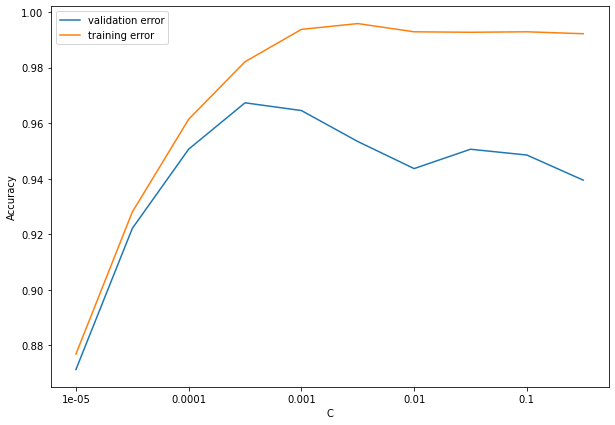

In [164]:
fig, ax = plt.subplots()
ax.plot(df["mean_test_score"], label="validation error") #blue line
ax.plot(df["mean_train_score"], label="training error") # red line
ax.set_xticklabels(df["param_C"])
ax.set_xlabel("C") # sets label of x axis
ax.set_ylabel("Accuracy") # sets label of y axis
ax.legend(loc="upper left"); # upper left location to display legend